##Notebook created by: Austin Copley (acopley@umass.edu) and Abdul Aziz (abdulaziz@umass.edu) for COMPSCI 528: Ubiquitous and Mobile Computing (Fall 2024)

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [53]:
train_labels = pd.read_csv(os.path.join(os.getcwd(), "train.csv")) # Update directory
val_labels = pd.read_csv(os.path.join(os.getcwd(), "validate.csv")) # Update directory

train_dir = val_dir = os.path.join(os.getcwd(), "dataset") # Update directory

In [3]:
# Function to load dataset
def load_data(label_df, data_dir):
    # Empty lists to store features and labels
    features = []
    labels = []

    for _, row in label_df.iterrows():
        filename = os.path.join(data_dir, row['filename'] + ".csv")

        # Read file into pandas dataframe
        df = pd.read_csv(filename)

        # Keep only accelerometer and gyroscope signals
        data = df[['x', 'y']].values.astype(np.float32)

        # Normalize data
        data = (data - data.min(axis=0) + 1) / (data.max(axis=0) - data.min(axis=0) + 1)

        # Populate lists with normalized data and labels
        features.append(data.flatten())
        #labels.append(row['0'])
        labels.append(filename.split("_")[0].split('\\')[-1])

    try:
        return np.array(features), np.array(labels)
    except:
        print(features, labels)





In [57]:
def train_and_evaluate_svm(X_train, y_train, X_test, y_test):
    # Create the SVM classifier
    svm_classifier = SVC(kernel='rbf', probability=True)

    # Train the classifier
    svm_classifier.fit(X_train, y_train)

    # Perform prediction on the test set
    y_pred = svm_classifier.predict(X_test)
    prob = svm_classifier.predict_proba(X_test)

    for i in range(len(prob)):
        if max(prob[i]) < 0.3:
            y_pred[i] = 'noise'

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'SVM accuracy: {accuracy:.3%}')

    # Plot the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
    plt.title('train')
    plt.xlabel('pred')
    plt.ylabel('actual')
    plt.show()

In [5]:
def train_and_evaluate_knn(X_train, y_train, X_test, y_test, n_neighbors=3):
    # Create the KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Train the classifier
    knn_classifier.fit(X_train, y_train)

    # Perform prediction on the test set
    y_pred = knn_classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'KNN accuracy: {accuracy:.3%}')

    # Plot the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, cmap="Blues")
    plt.title('train')
    plt.xlabel('pred')
    plt.ylabel('actual')
    plt.show()

In [54]:
# Create the train and test sets
X_train, y_train = load_data(train_labels, train_dir)
X_test, y_test = load_data(val_labels, val_dir)

### SVM

SVM accuracy: 77.551%


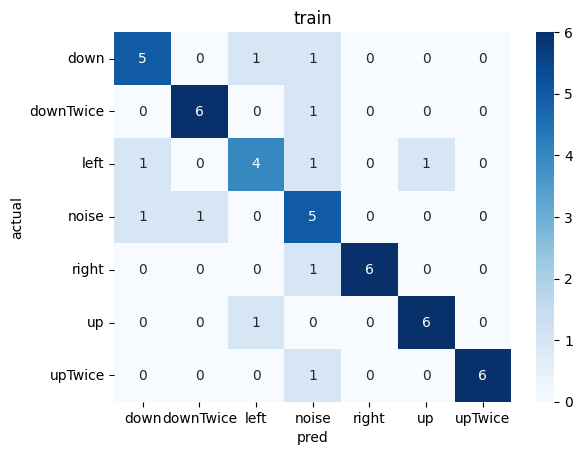

In [58]:
# Perform training and testing with SVM
train_and_evaluate_svm(X_train, y_train, X_test, y_test)

### KNN

KNN accuracy: 72.308%


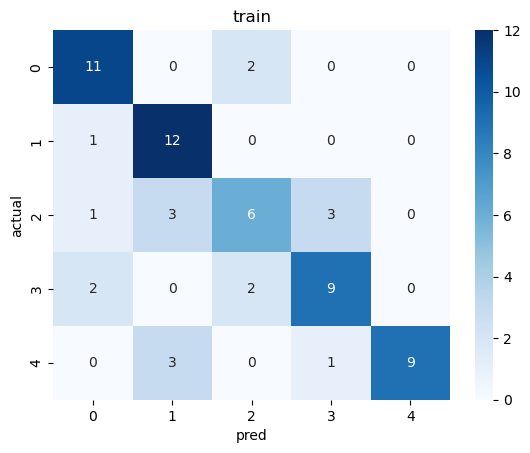

In [16]:
# Perform training and testing with KNN
train_and_evaluate_knn(X_train, y_train, X_test, y_test)